## Plotting candlestic chart using Matplotlib

- 참고자료 : [Matplotlib Candlestick Chart in Python]( https://saralgyaan.com/posts/python-candlestick-chart-matplotlib-tutorial-chapter-11/)  
- 참고자료 : [Python으로 캔들스틱 차트 그리기](https://jsp-dev.tistory.com/entry/Python%EC%9C%BC%EB%A1%9C-%EC%BA%94%EB%93%A4%EC%8A%A4%ED%8B%B1-%EC%B0%A8%ED%8A%B8-Candlestick-chart-%EA%B7%B8%EB%A6%AC%EA%B8%B0)

<div style="text-align: right"> Initial upload: 2020.08.19 </div>
<div style="text-align: right"> Last update: 2020.08.19 </div>

주식 데이터 분석에 자주 사용되는 캔들차트를 그리는 방법에 대하여 살펴본다.  
mple_finance 라이브러리를 사용한다.

In [28]:
# !pip -q install finance-datareader

In [1]:
import numpy as np
import pandas as pd
import warnings; warnings.filterwarnings('ignore')
import datetime

# Options for pandas
pd.options.display.max_columns = 20

In [118]:
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.dates as mpl_dates
plt.style.use('ggplot')
%matplotlib inline

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() # pdr이 야후에서 데이터를 획들할 때 크롤링으로 변경되도록 함

import FinanceDataReader as fdr

### 1. 데이터 읽어오기  
- 여기서는 코스닥 종목인 누리텔레콤(`040160`) 데이터를 사용한다.

In [50]:
yesterday= (datetime.datetime.now() - \
             datetime.timedelta(days = 1)).strftime('%Y-%m-%d')

In [51]:
yesterday

'2020-08-18'

오늘 날짜 기준 5일전 까지의 데이터를 추출

In [52]:
stock = pdr.get_data_yahoo('040160.KQ', start = '2020-01-01', end = yesterday)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 040160.KQ: No data found for this date range, symbol may be delisted


- yahoo finance 기반 데이터 취득은 시작/ 종료일 데이터가 없으면 추출이 되지 않는 문제가 있음  
- 그리고 데이터 오류가 많다.
- 여기서는 `FinanceDataReader` 데이터를 사용한다.

In [53]:
stock = fdr.DataReader('040160', start = '2020-01-01', end = yesterday)

In [54]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,5490,5690,5480,5630,165271,0.025501
2020-01-03,5830,5960,5620,5700,259321,0.012433
2020-01-06,5680,5680,5450,5580,75677,-0.021053
2020-01-07,5580,5750,5530,5650,26591,0.012545
2020-01-08,5650,5650,5300,5370,54629,-0.049558


In [55]:
stock.shape

(157, 6)

In [56]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 157 entries, 2020-01-02 to 2020-08-18
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    157 non-null    int64  
 1   High    157 non-null    int64  
 2   Low     157 non-null    int64  
 3   Close   157 non-null    int64  
 4   Volume  157 non-null    int64  
 5   Change  157 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 8.6 KB


필요한 컬럼만 추출한다.  

In [57]:
stock = stock[['Open', 'High', 'Low', 'Close']]

In [61]:
stock['Date'] = stock.index

In [62]:
stock.head()

,Open,High,Low,Close,Date
Date,,,,,
2020-01-02,5490,5690,5480,5630,2020-01-02
2020-01-03,5830,5960,5620,5700,2020-01-03
2020-01-06,5680,5680,5450,5580,2020-01-06
2020-01-07,5580,5750,5530,5650,2020-01-07
2020-01-08,5650,5650,5300,5370,2020-01-08


In [63]:
stock = stock[['Date', 'Open', 'High', 'Low', 'Close']]

In [72]:
stock['Date'] = pd.to_datetime(stock.index)
stock['Date'] = stock['Date'].apply(mpl_dates.date2num)
# datetime 포맷을 matplotlib에서 사용하는 포맷으로 바꿔준다.

In [73]:
stock.head()

,Date,Open,High,Low,Close
Date,,,,,
2020-01-02,737426.0,5490,5690,5480,5630
2020-01-03,737427.0,5830,5960,5620,5700
2020-01-06,737430.0,5680,5680,5450,5580
2020-01-07,737431.0,5580,5750,5530,5650
2020-01-08,737432.0,5650,5650,5300,5370


In [74]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 157 entries, 2020-01-02 to 2020-08-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    157 non-null    float64
 1   Open    157 non-null    int64  
 2   High    157 non-null    int64  
 3   Low     157 non-null    int64  
 4   Close   157 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 7.4 KB


### 2. 캔들차트 그리기

일단 그려보기

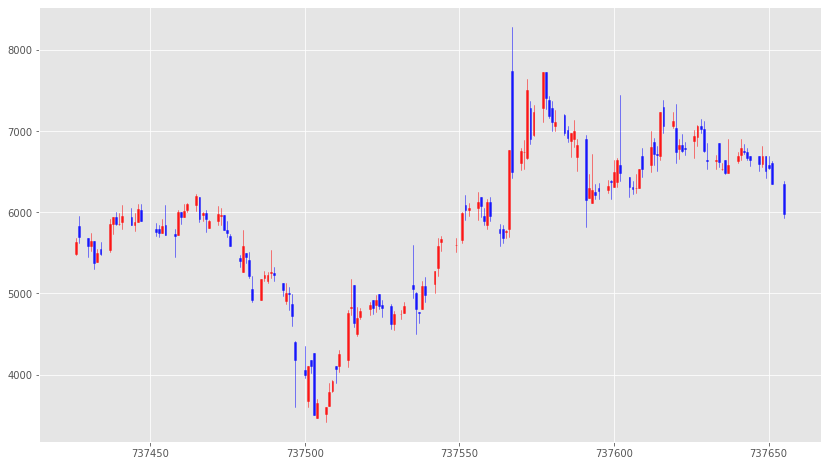

In [80]:
fig, ax = plt.subplots(figsize = (14, 8))
candlestick_ohlc(ax, stock.values, width=0.6, \
                   colorup='red', colordown='blue', alpha=0.8)
plt.show()

x축에 날짜 추가하기

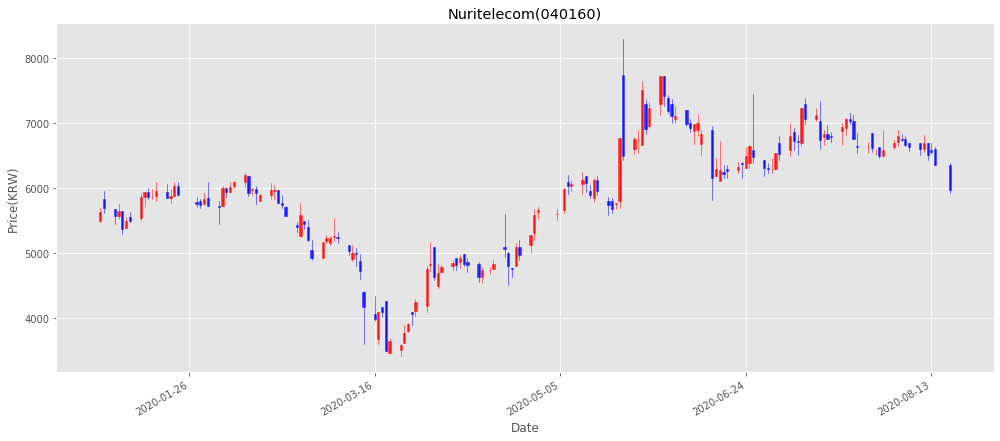

In [88]:
fig, ax = plt.subplots(figsize = (14, 6))
candlestick_ohlc(ax, stock.values, width=0.6, \
                   colorup='red', colordown='blue', alpha=0.8)
date_format = mpl_dates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('Date')
ax.set_ylabel('Price(KRW)')
fig.autofmt_xdate()
fig.tight_layout()
plt.title('Nuritelecom(040160)')
plt.show()

이동평균선 추가하기

In [90]:
ma5 = stock['Close'].rolling(window = 5).mean()
ma20 = stock['Close'].rolling(window = 20).mean()
ma60 = stock['Close'].rolling(window = 60).mean()

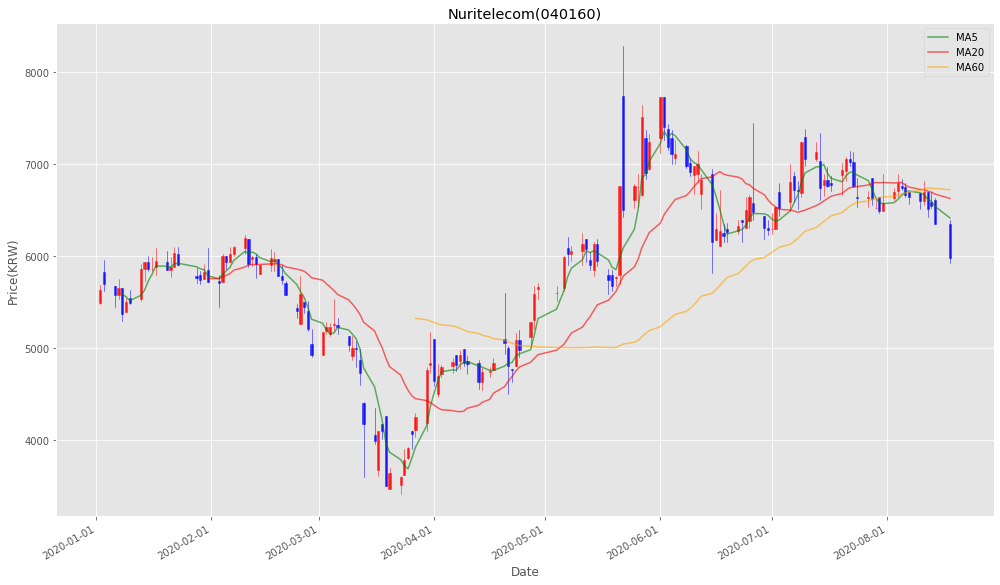

In [95]:
fig, ax = plt.subplots(figsize = (14, 8))
candlestick_ohlc(ax, stock.values, width=0.6, \
                   colorup='red', colordown='blue', alpha=0.8)
date_format = mpl_dates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('Date')
ax.set_ylabel('Price(KRW)')

ax.plot(ma5, label = 'MA5', color = 'g', alpha = 0.6)
ax.plot(ma20, label = 'MA20', color = 'r', alpha = 0.6)
ax.plot(ma60, label = 'MA60', color = 'orange', alpha = 0.6)

fig.autofmt_xdate()
fig.tight_layout()
plt.title('Nuritelecom(040160)')
plt.legend(loc ='best')
plt.show()

**또 다른 방법**  
- 참고자료 : https://jsp-dev.tistory.com/entry/Python%EC%9C%BC%EB%A1%9C-%EC%BA%94%EB%93%A4%EC%8A%A4%ED%8B%B1-%EC%B0%A8%ED%8A%B8-Candlestick-chart-%EA%B7%B8%EB%A6%AC%EA%B8%B0

In [96]:
from mpl_finance import candlestick2_ochl

In [98]:
# xticks에 사용하기 위해 날짜 인덱스를 문자열로 저장
index = stock.index.astype('str')

In [97]:
ma5 = stock['Close'].rolling(window = 5).mean()
ma20 = stock['Close'].rolling(window = 20).mean()
ma60 = stock['Close'].rolling(window = 60).mean()

In [99]:
# X축에 쓰일 날짜 조정
def x_date(x, pos):
    try:
        return index[int(x-0.5)][:7]
    except IndexError:
        return ''

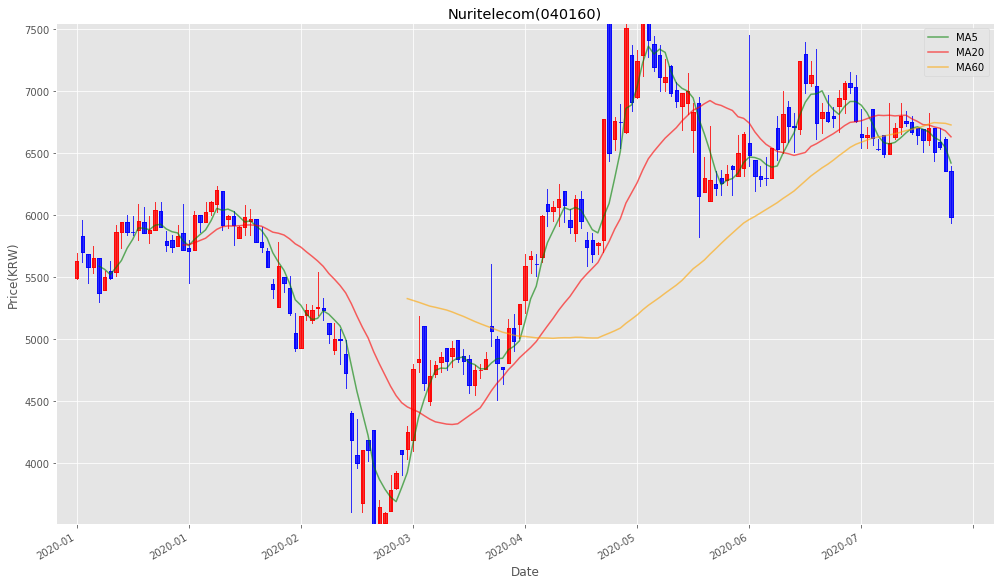

In [112]:
fig, ax = plt.subplots(figsize = (14, 8))

ax.xaxis.set_major_locator(ticker.MaxNLocator(10))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(x_date))



candlestick2_ohlc(ax, stock['Open'], stock['High'], stock['Low'], stock['Close'],
                  width=0.6, colorup='red', colordown='blue', alpha=0.8)
ax.set_xlabel('Date')
ax.set_ylabel('Price(KRW)')

ax.plot(index, ma5, label = 'MA5', color = 'g', alpha = 0.6)
ax.plot(index, ma20, label = 'MA20', color = 'r', alpha = 0.6)
ax.plot(index, ma60, label = 'MA60', color = 'orange', alpha = 0.6)

fig.autofmt_xdate()
fig.tight_layout()
plt.title('Nuritelecom(040160)')
plt.legend(loc ='best')
plt.show()

### 3. 캔들차트에 이동평균선, 거래량 차트 추가하기

데이터 가져오기

In [129]:
stock = fdr.DataReader('040160', start = '2020-01-01', end = yesterday)
stock['Date'] = stock.index
stock = stock[['Date','Open', 'High', 'Low', 'Close', 'Volume']]

In [130]:
stock.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2020-01-02,2020-01-02,5490,5690,5480,5630,165271
2020-01-03,2020-01-03,5830,5960,5620,5700,259321
2020-01-06,2020-01-06,5680,5680,5450,5580,75677
2020-01-07,2020-01-07,5580,5750,5530,5650,26591
2020-01-08,2020-01-08,5650,5650,5300,5370,54629


차트 레이아웃 그리기  
- 참고자료 : http://blog.quantylab.com/candlestick.html

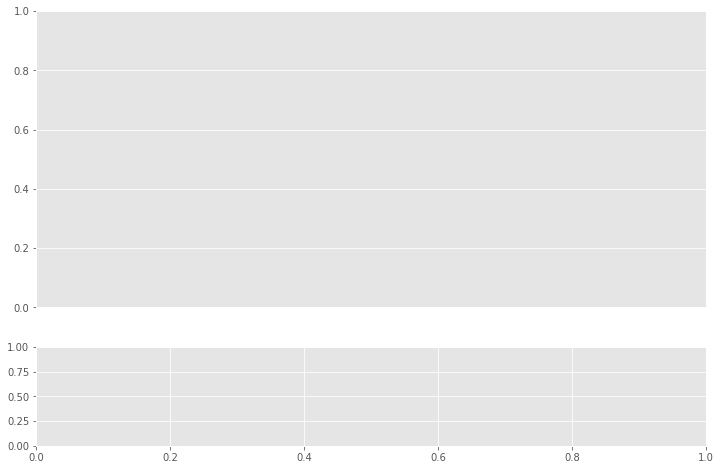

In [120]:
fig = plt.figure(figsize=(12, 8))
fig.set_facecolor('w')
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1], sharex=axes[0]))
axes[0].get_xaxis().set_visible(False)

차트 그려보기

In [124]:
x = np.arange(len(stock.index))
ohlc = stock[['Open', 'High', 'Low', 'Close']].astype(int).values
dohlc = np.hstack((np.reshape(x, (-1, 1)), ohlc))

In [127]:
dohlc[:5] # 인덱스 부분을 첨부하기 위해

array([[   0, 5490, 5690, 5480, 5630],
       [   1, 5830, 5960, 5620, 5700],
       [   2, 5680, 5680, 5450, 5580],
       [   3, 5580, 5750, 5530, 5650],
       [   4, 5650, 5650, 5300, 5370]])

In [128]:
ma5 = stock['Close'].rolling(window = 5).mean()
ma20 = stock['Close'].rolling(window = 20).mean()
ma60 = stock['Close'].rolling(window = 60).mean()

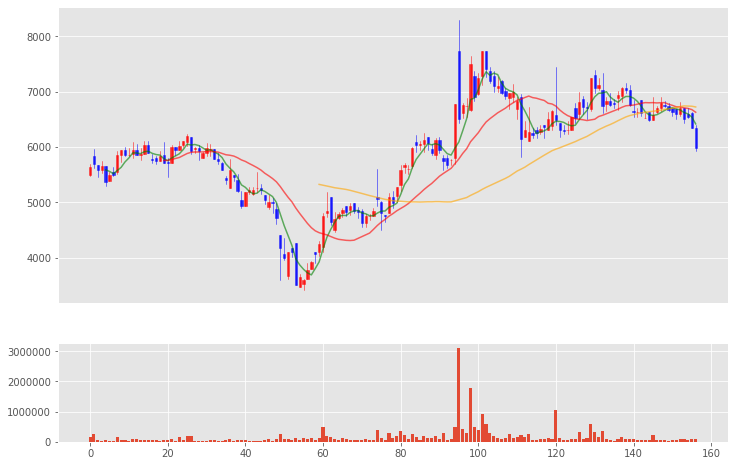

In [142]:
fig = plt.figure(figsize=(12, 8))
fig.set_facecolor('w')
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1], sharex=axes[0]))
axes[0].get_xaxis().set_visible(False)

candlestick_ohlc(axes[0], dohlc, width=0.6, \
                   colorup='red', colordown='blue', alpha=0.8)

axes[0].plot(ma5.values, label = 'MA5', color = 'g', alpha = 0.6)
axes[0].plot(ma20.values, label = 'MA20', color = 'r', alpha = 0.6)
axes[0].plot(ma60.values, label = 'MA60', color = 'orange', alpha = 0.6)

#plt.title('Nuritelecom(040160)')
#plt.legend(loc ='best')

axes[1].bar(x, stock['Volume'])


plt.show()

틱 레이블 추가하기  
- 월요일에 해당하는 날짜만 추가한다.

In [144]:
stock['Date']

Date
2020-01-02   2020-01-02
2020-01-03   2020-01-03
2020-01-06   2020-01-06
2020-01-07   2020-01-07
2020-01-08   2020-01-08
                ...    
2020-08-11   2020-08-11
2020-08-12   2020-08-12
2020-08-13   2020-08-13
2020-08-14   2020-08-14
2020-08-18   2020-08-18
Name: Date, Length: 157, dtype: datetime64[ns]

In [146]:
_xticks = []
_xlabels = []
_wd_prev = 0
for _x, d in zip(x, stock['Date'].astype(str).values):
    weekday = datetime.datetime.strptime(str(d), '%Y-%m-%d').weekday()
    if weekday <= _wd_prev:
        _xticks.append(_x)
        _xlabels.append(datetime.datetime.strptime(str(d), '%Y-%m-%d').strftime('%m/%d'))
    _wd_prev = weekday

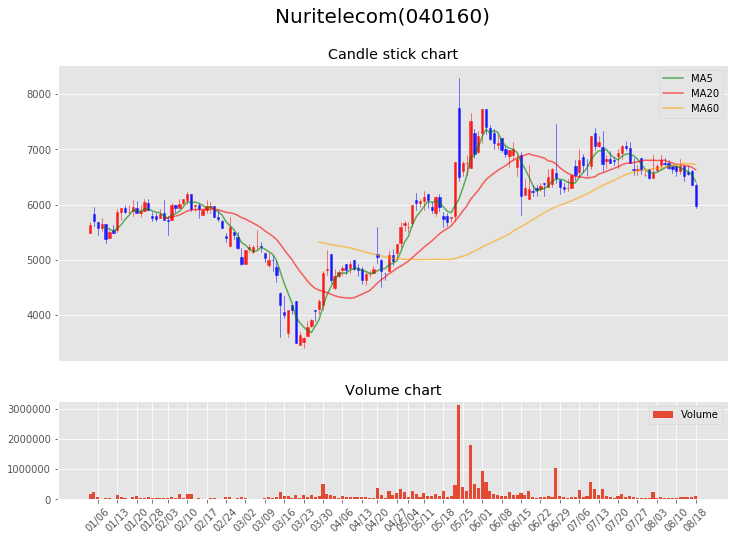

In [154]:
fig = plt.figure(figsize=(12, 8))
fig.set_facecolor('w')
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

#fig, axes = plt.subplots(nrows=2, ncols=1, sharex='col', sharey=True,
#                               gridspec_kw={'height_ratios': [2, 1]},
#                               figsize=(12, 8))

axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1], sharex=axes[0]))
axes[0].get_xaxis().set_visible(False)

candlestick_ohlc(axes[0], dohlc, width=0.6, \
                   colorup='red', colordown='blue', alpha=0.8)

axes[0].plot(ma5.values, label = 'MA5', color = 'g', alpha = 0.6)
axes[0].plot(ma20.values, label = 'MA20', color = 'r', alpha = 0.6)
axes[0].plot(ma60.values, label = 'MA60', color = 'orange', alpha = 0.6)
axes[0].legend()

#plt.title('Nuritelecom(040160)')
#plt.legend(loc ='best')

axes[1].bar(x, stock['Volume'], label='Volume')
axes[1].set_xticks(_xticks)
axes[1].set_xticklabels(_xlabels, rotation=45, minor=False)
axes[1].legend()

fig.suptitle('Nuritelecom(040160)', size=20)
plt.setp(axes[0], title='Candle stick chart')
plt.setp(axes[1], title='Volume chart')
plt.show()